In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_excel('accoData.xlsx')
data = pd.read_excel('accoData.xlsx')
df
del df['Aircon']
df = df.rename(columns={'backup power': 'backupPower'})
df

,Location,rent,wifi,backupPower,Stove,Fridge,separate_kitchen,curfew,distance,visitors,...,Water_tank,maid,gas_stove,gyser,gender,swimming_pool,per_room,beds,security,meals
0,mt_pleasant,130,yes,yes,yes,yes,yes,no,18.0,yes,...,yes,no,no,no,both,no,2,yes,no,no
1,mt_pleasant,120,yes,yes,yes,yes,yes,no,18.0,yes,...,yes,no,no,no,both,no,4,yes,no,no
2,mt_pleasant,100,yes,yes,yes,yes,yes,no,18.0,yes,...,yes,no,no,no,both,no,6,yes,no,no
3,mt_pleasant,100,yes,yes,yes,no,yes,yes,15.0,yes,...,yes,yes,yes,yes,girls,no,3,yes,no,no
4,mt_pleasant,120,yes,yes,yes,yes,yes,no,18.0,yes,...,yes,yes,no,yes,girls,no,2,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,avondale,100,yes,yes,yes,yes,yes,no,1.0,yes,...,yes,no,no,no,girls,no,3,yes,yes,no
424,mt pleasant heights,100,yes,yes,yes,yes,yes,yes,10.0,yes,...,yes,yes,no,no,girls,no,4,yes,yes,no
425,parirenyatwa,170,yes,yes,yes,yes,yes,no,5.0,yes,...,yes,yes,yes,no,girls,no,5,yes,yes,no
426,belgravia shops,180,yes,no,yes,yes,yes,yes,1.0,yes,...,yes,yes,yes,no,both,no,3,yes,yes,no


In [3]:


df[df.Location == 'opposite_uz']

,Location,rent,wifi,backupPower,Stove,Fridge,separate_kitchen,curfew,distance,visitors,...,Water_tank,maid,gas_stove,gyser,gender,swimming_pool,per_room,beds,security,meals
9,opposite_uz,170,yes,yes,yes,yes,yes,no,5.0,yes,...,yes,yes,no,no,both,no,2,yes,yes,no
10,opposite_uz,170,yes,yes,yes,yes,yes,no,1.0,yes,...,yes,yes,no,no,girls,no,5,yes,yes,no
11,opposite_uz,170,yes,yes,yes,yes,yes,no,5.0,yes,...,yes,yes,no,no,girls,no,3,yes,yes,no
12,opposite_uz,130,yes,yes,yes,yes,yes,no,1.0,yes,...,yes,yes,no,no,both,no,5,yes,yes,no
270,opposite_uz,170,yes,yes,yes,yes,yes,no,1.0,yes,...,yes,yes,no,no,girls,no,5,yes,yes,no
397,opposite_uz,170,yes,yes,yes,yes,yes,no,5.0,yes,...,yes,yes,no,no,both,no,2,yes,yes,no
398,opposite_uz,170,yes,yes,yes,yes,yes,no,1.0,yes,...,yes,yes,no,no,girls,no,5,yes,yes,no
399,opposite_uz,170,yes,yes,yes,yes,yes,no,5.0,yes,...,yes,yes,no,no,girls,no,3,yes,yes,no
400,opposite_uz,130,yes,yes,yes,yes,yes,no,1.0,yes,...,yes,yes,no,no,both,no,5,yes,yes,no


In [4]:
df.Location.value_counts()
df.isna().sum()

Location             3
rent                 0
wifi                 0
backupPower          0
Stove                0
Fridge               0
separate_kitchen     0
curfew               0
distance             7
visitors             0
Shelves              0
Water_tank           0
maid                 0
gas_stove            0
gyser                3
gender               0
swimming_pool        0
per_room             1
beds                20
security             0
meals                0
dtype: int64

In [5]:
df.curfew.value_counts()

curfew
no     245
yes    183
Name: count, dtype: int64

In [6]:
# df[df['Stove'] == 'no']
# Stove is very crucial since it clusters cheap houses

In [7]:
df[df.Fridge == 'no']
# fridge feature has no high relevance to this dataset

,Location,rent,wifi,backupPower,Stove,Fridge,separate_kitchen,curfew,distance,visitors,...,Water_tank,maid,gas_stove,gyser,gender,swimming_pool,per_room,beds,security,meals
3,mt_pleasant,100,yes,yes,yes,no,yes,yes,15.0,yes,...,yes,yes,yes,yes,girls,no,3,yes,no,no
132,mt pleasant,160,yes,yes,yes,no,yes,yes,8.0,yes,...,yes,no,yes,yes,girls,no,2,NaN,yes,no
327,mt pleasant,160,yes,yes,yes,no,yes,yes,8.0,yes,...,yes,no,yes,no,both,no,3,yes,no,no
391,mt_pleasant,100,yes,yes,yes,no,yes,yes,15.0,yes,...,yes,yes,yes,yes,girls,no,3,yes,no,no


In [8]:
df.separate_kitchen.value_counts()
df[df.separate_kitchen == 'no']

,Location,rent,wifi,backupPower,Stove,Fridge,separate_kitchen,curfew,distance,visitors,...,Water_tank,maid,gas_stove,gyser,gender,swimming_pool,per_room,beds,security,meals
26,Epping,165,yes,yes,yes,yes,no,no,7.0,yes,...,yes,no,yes,no,both,no,2,yes,no,no
27,Alex park,150,yes,no,yes,yes,no,no,2.0,yes,...,yes,no,yes,no,both,no,3,yes,yes,no
28,mt-pleasant,130,yes,no,yes,yes,no,no,7.0,yes,...,yes,no,yes,no,both,no,2,yes,no,no
54,mt pleasant heights,120,yes,yes,yes,yes,no,yes,40.0,yes,...,no,no,no,no,boys,no,3,yes,no,no
63,mt pleasant,100,yes,yes,yes,yes,no,yes,30.0,no,...,yes,no,yes,no,girls,no,2,yes,no,no
64,mt pleasant,125,yes,yes,yes,yes,no,yes,30.0,no,...,yes,no,yes,no,girls,no,3,yes,no,no
94,opposite uz,165,yes,yes,yes,yes,no,yes,5.0,no,...,yes,no,yes,yes,both,no,3,yes,yes,no
96,uz main gate,130,yes,yes,yes,yes,no,yes,10.0,yes,...,yes,no,yes,yes,girls,no,2,yes,yes,no
117,mt pleasant heights,135,yes,yes,yes,yes,no,no,30.0,yes,...,yes,no,yes,yes,girls,no,2,yes,no,no
118,mt pleasant,135,yes,yes,yes,yes,no,yes,45.0,yes,...,yes,no,yes,no,girls,no,4,yes,no,no


In [9]:
df.Location.value_counts()

Location
mt pleasant            101
opposite uz             48
uz main gate            41
mt pleasant heights     36
mt_pleasant             27
marlbrough              25
vainona                 18
avenue                  14
hatcliff                13
avondale                11
near uz main gate       10
opposite_uz              9
parirenyatwa             8
brighton road            7
pomona                   6
near parirenyatwa        5
mt_pleasant_arundel      5
groombridge              5
belgravia shops          4
pendenis                 3
close to belgravia       3
borrowdale               3
mt  pleasant             3
epping road              3
near uz churchhill       3
belgravia                3
churchill                3
hatcliffe                2
hatclif                  2
mt-pleasant              1
Alex park                1
Epping                   1
mt pleasant heigths      1
Name: count, dtype: int64

In [10]:
df.loc[df.Location == 'mt-pleasant', 'Location'] = 'mt_pleasant'
df.loc[df.Location == 'mt pleasant', "Location"] = 'mt_pleasant'
df.loc[df.Location == 'mt  pleasant', "Location"] = 'mt_pleasant'
df.loc[df.Location == 'mt pleasant heights', "Location"] = 'mt_pleasant'
df.loc[df.Location == 'mt pleasant heigths', "Location"] = 'mt_pleasant'
# df.loc[df.Location == 'mount_pleasant', "Location"  ]= 'mt_pleasant'
df.loc[df.Location == 'mt_pleasant_arundel', "Location"] = 'arundel'
df.loc[df.Location == 'hatclif', "Location"] = 'hatcliff'
df.loc[df.Location == 'hatcliffe', "Location"] = 'hatcliff'
df.loc[df.Location == 'uz main gate', "Location"] = 'main_gate'
df.loc[df.Location == 'near uz main gate', "Location"] = 'main_gate'
df.loc[df.Location == 'opposite uz', "Location"] = 'op_uz'
df.loc[df.Location == 'brighton road', "Location"] = 'brighton_road'
df.loc[df.Location == 'near parirenyatwa', "Location"] = 'parirenyatwa'
df.loc[df.Location == 'belgravia shops', "Location"] = 'belgravia'
df.loc[df.Location == 'close to belgravia', "Location"] = 'belgravia'
df.loc[df.Location == 'near uz churchhill', "Location"] = 'churchill'
df.loc[df.Location == 'epping road', "Location"] = 'epping'
df.loc[df.Location == 'Epping', "Location"] = 'epping'
df.loc[df.Location == 'Epping', "Location"] = 'epping'
df.loc[df.Location == 'opposite_uz', "Location"] = 'op_uz'
# df.loc[(df.Location == 'op_uz') & df., "Location"  ]= 'op_uz'


# fix the names of the locations to cluster them

np.random.seed(43)
df.Location.value_counts()
df[(df.Location == 'op_uz') & (df.distance > 10) & (df.rent > 165)]
# df.loc[(df.Location == 'op_uz') & (df.distance> 10) &(df.rent > 169)   & (df.rent< 180), 'distance'] = np.random.randint(3,7,
# size=len(df.query('Location == "op_uz" & rent >169  & rent < 180 & distance>10  '))
# )
df.loc[(df.Location == 'pomona'), 'distance'] = np.random.randint(30, 40)
df.loc[(df.Location == 'belgravia'), 'distance'] = np.random.randint(
    10, 20, size=len(df.query('Location == "belgravia"')))
df.loc[(df.Location == 'belgravia'), 'distance'] = np.random.randint(
    10, 20, size=len(df.query('Location == "belgravia"')))
# df.loc[(df.Location == 'avondale' ) & (df.rent> 179), 'distance'] = np.random.randint(20,30,
#                                                                                     #   size=len(df.query('Location == "avondale" & rent > 179 '))
#                                                                                       )
# df.loc[(df.Location == 'avondale' ) & (df.rent< 179), 'distance'] = np.random.randint(10,20,
#                                                                                     #   size=len(df.query('Location == "avondale" & rent > 179 '))
#                                                                                       )
df.loc[(df.Location == 'parirenyatwa') & (df.rent > 150), 'distance'] = np.random.randint(5, 10,
                                                                                          size=len(
                                                                                              df.query('Location == "parirenyatwa" & rent >150'))
                                                                                          )
df.loc[(df.Location == 'parirenyatwa') & (df.rent < 150), 'distance'] = np.random.randint(15, 20,
                                                                                          size=len(
                                                                                              df.query('Location == "parirenyatwa" & rent <150'))
                                                                                          )
# df.loc[(df.Location == 'op_uz') & (df.rent > 180) & (df.meals == 'yes'), 'distance'] = np.random.randint(1,3)
df.loc[(df.Location == 'op_uz') & (df.rent < 151) & (
    df.distance > 10), 'Location'] = 'mt_pleasant'
df.loc[(df.Location == 'op_uz') & (df.rent < 170) & (
    df.distance > 10), 'Location'] = 'mt_pleasant'
df.loc[(df.Location == 'mt_pleasant') & (df.distance < 8)
       & (df.rent > 170), 'Location'] = 'op_uz'
df.loc[(df.Location == 'hatcliff') & (df.distance < 60), 'distance'] = np.random.randint(70, 100,
                                                                                         size=len(
                                                                                             df.query('Location == "hatcliff" & distance <60'))
                                                                                         )
df.loc[(df.Location == 'vainona') & (df.distance < 11), 'distance'] = np.random.randint(
    30, 35, size=len(df.query('Location == "vainona" & distance<11')))
# df.loc[(df.Location == 'vainona') & (df.rent <100) , 'distance'] = np.random.randint(20, 30, size=len(df.query('Location == "vainona" & rent <100')))
# df = df[df.Location != 'arundel']
df.loc[(df.rent >= 170) & (df.Location != 'op_uz'), 'meals'] = 'yes'
# df.loc[(df.rent>= 190) & (df.Location != 'op_uz'), 'security' ] = 'yes'
# df.loc[(df.rent>= 190) & (df.Location != 'op_uz'), 'gyser' ] = 'yes'
# df.loc[(df.meals == 'yes'), 'maid' ] = 'yes'

# df[(df.Location == 'op_uz') &(df.rent < 141)]
# df = df[df.Location != 'mt_pleasant']
# df[df.rent>150]
# df = df[df.Location == 'mt_pleasant']
df.Location.value_counts()
# sns.scatterplot(df.distance, df.rent, hue= df.meals)
df[df.meals == 1]

,Location,rent,wifi,backupPower,Stove,Fridge,separate_kitchen,curfew,distance,visitors,...,Water_tank,maid,gas_stove,gyser,gender,swimming_pool,per_room,beds,security,meals


## Handle missing data


In [11]:
# handle missing per_room number
df.loc[df.per_room == '#####', "per_room"] = 4
df.per_room.value_counts()
df.columns

Index(['Location', 'rent', 'wifi', 'backupPower', 'Stove', 'Fridge',
       'separate_kitchen', 'curfew', 'distance', 'visitors', 'Shelves',
       'Water_tank', 'maid', 'gas_stove', 'gyser', 'gender', 'swimming_pool',
       'per_room', 'beds', 'security', 'meals'],
      dtype='object')

In [12]:
df.columns

Index(['Location', 'rent', 'wifi', 'backupPower', 'Stove', 'Fridge',
       'separate_kitchen', 'curfew', 'distance', 'visitors', 'Shelves',
       'Water_tank', 'maid', 'gas_stove', 'gyser', 'gender', 'swimming_pool',
       'per_room', 'beds', 'security', 'meals'],
      dtype='object')

In [13]:
# handle missing location
df.Location.fillna('mount_pleasant', inplace=True)
df.isna().sum()

C:\Users\Augah\AppData\Local\Temp\ipykernel_11064\959181428.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Location.fillna('mount_pleasant', inplace=True)


Location             0
rent                 0
wifi                 0
backupPower          0
Stove                0
Fridge               0
separate_kitchen     0
curfew               0
distance             6
visitors             0
Shelves              0
Water_tank           0
maid                 0
gas_stove            0
gyser                3
gender               0
swimming_pool        0
per_room             1
beds                20
security             0
meals                0
dtype: int64

In [14]:
df.loc[df.gyser == ' yes', 'gyser'] = 'yes'
df = df.loc[df.gyser != ' yes']
df.loc[df.beds.isna(), 'beds'] = 'yes'

In [15]:
# impute missing distance

distance_dict = {}

for location in df.Location.unique():

    location_data = df[df['Location'] == location]
    avg_distance = location_data.distance.mean()
    distance_dict[location] = avg_distance
    df.loc[(df.Location == location) & (
        df.distance.isna()), 'distance'] = avg_distance


# print(distance_dict)
    # print(df.loc[df.Location == location , : ])
df.isna().sum()

Location            0
rent                0
wifi                0
backupPower         0
Stove               0
Fridge              0
separate_kitchen    0
curfew              0
distance            0
visitors            0
Shelves             0
Water_tank          0
maid                0
gas_stove           0
gyser               3
gender              0
swimming_pool       0
per_room            1
beds                0
security            0
meals               0
dtype: int64

In [16]:
df.dropna(axis=0, inplace=True)
df.isna().sum()

Location            0
rent                0
wifi                0
backupPower         0
Stove               0
Fridge              0
separate_kitchen    0
curfew              0
distance            0
visitors            0
Shelves             0
Water_tank          0
maid                0
gas_stove           0
gyser               0
gender              0
swimming_pool       0
per_room            0
beds                0
security            0
meals               0
dtype: int64

In [17]:
df.per_room = df.per_room.astype('int64')
df = df.assign(**{col: df[col].astype('category') for col in df.select_dtypes(include='object')})

df.dtypes

Location            category
rent                   int64
wifi                category
backupPower         category
Stove               category
Fridge              category
separate_kitchen    category
curfew              category
distance             float64
visitors            category
Shelves             category
Water_tank          category
maid                category
gas_stove           category
gyser               category
gender              category
swimming_pool       category
per_room               int64
beds                category
security            category
meals               category
dtype: object

<Axes: ylabel='Frequency'>

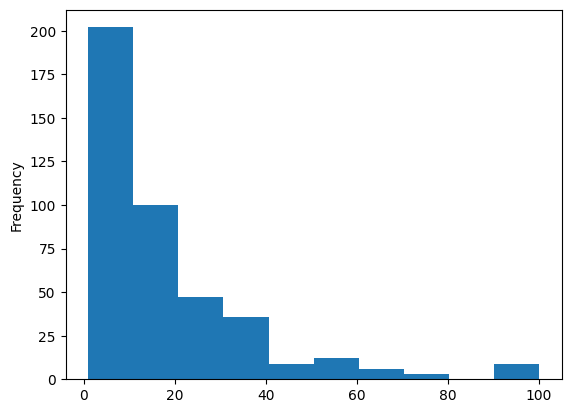

In [18]:
# (df.distance).plot.hist()
from scipy.stats import skew
skew(df.distance)
df.distance.plot.hist()

## PRIMARY VISUALIZATIONS


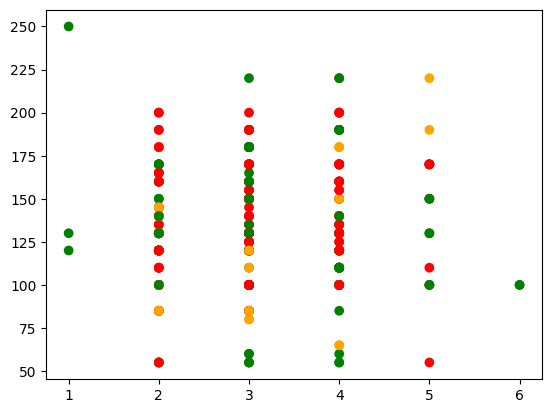

In [19]:
plt.scatter(df.per_room, df.rent, c=np.where(df.gender == 'girls',
            'red', np.where(df.gender == 'boys', 'orange', 'green')))

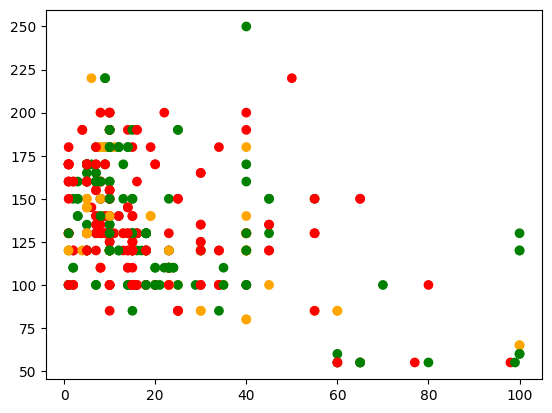

In [20]:
plt.scatter(df.distance, df.rent, c=np.where(df.gender == 'girls',
            'red', np.where(df.gender == 'boys', 'orange', 'green')))

Text(0, 0.5, 'rent')

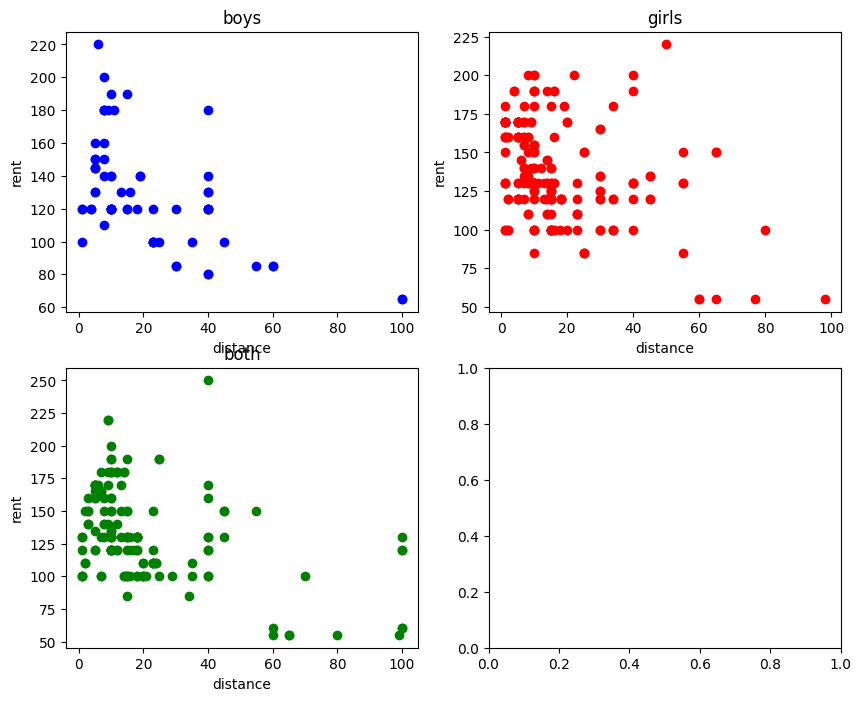

In [21]:
fig, ((ax, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ax.scatter(df[df.gender == 'boys'].distance,
           df[df.gender == 'boys'].rent, c='blue')
ax1.scatter(df[df.gender == 'girls'].distance,
            df[df.gender == 'girls'].rent, c='red')
ax2.scatter(df[df.gender == 'both'].distance,
            df[df.gender == 'both'].rent, c='green')
ax.set_title('boys')
ax1.set_title('girls')
ax2.set_title('both')

ax.set_xlabel('distance')
ax1.set_xlabel('distance')
ax2.set_xlabel('distance')

ax.set_ylabel('rent')
ax1.set_ylabel('rent')
ax2.set_ylabel('rent')

<Axes: xlabel='rent'>

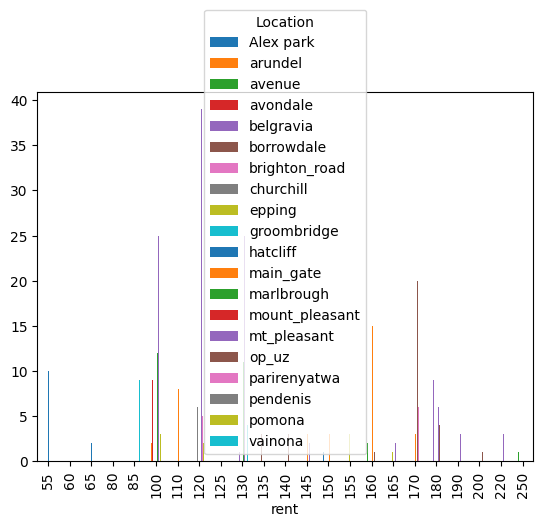

In [22]:
ct = pd.crosstab(df.Location, df.rent)

ct.T.plot(kind='bar')
# ct

### HANDLING OUTLIERS


<Axes: ylabel='Frequency'>

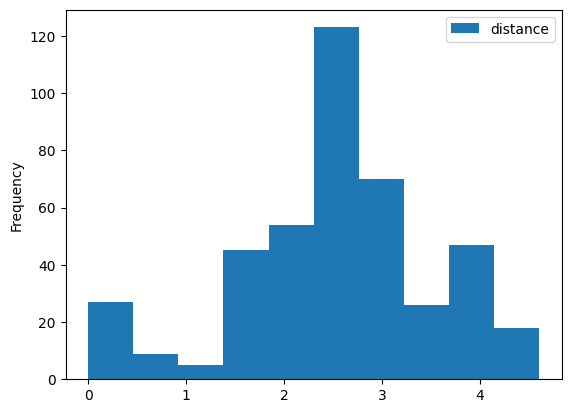

In [23]:
dist = np.log(df[['distance']])
df.distance = dist
dist.plot.hist()

In [24]:
df.loc[df.gender == 'boys ', 'gender'] = 'boys'
# df = df.loc[df.gender != 'boys ']
df.Location.value_counts()
df

,Location,rent,wifi,backupPower,Stove,Fridge,separate_kitchen,curfew,distance,visitors,...,Water_tank,maid,gas_stove,gyser,gender,swimming_pool,per_room,beds,security,meals
0,mt_pleasant,130,yes,yes,yes,yes,yes,no,2.890372,yes,...,yes,no,no,no,both,no,2,yes,no,no
1,mt_pleasant,120,yes,yes,yes,yes,yes,no,2.890372,yes,...,yes,no,no,no,both,no,4,yes,no,no
2,mt_pleasant,100,yes,yes,yes,yes,yes,no,2.890372,yes,...,yes,no,no,no,both,no,6,yes,no,no
3,mt_pleasant,100,yes,yes,yes,no,yes,yes,2.708050,yes,...,yes,yes,yes,yes,girls,no,3,yes,no,no
4,mt_pleasant,120,yes,yes,yes,yes,yes,no,2.890372,yes,...,yes,yes,no,yes,girls,no,2,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,avondale,100,yes,yes,yes,yes,yes,no,0.000000,yes,...,yes,no,no,no,girls,no,3,yes,yes,no
424,mt_pleasant,100,yes,yes,yes,yes,yes,yes,2.302585,yes,...,yes,yes,no,no,girls,no,4,yes,yes,no
425,parirenyatwa,170,yes,yes,yes,yes,yes,no,2.197225,yes,...,yes,yes,yes,no,girls,no,5,yes,yes,yes
426,belgravia,180,yes,no,yes,yes,yes,yes,2.302585,yes,...,yes,yes,yes,no,both,no,3,yes,yes,yes


<Axes: xlabel='rent'>

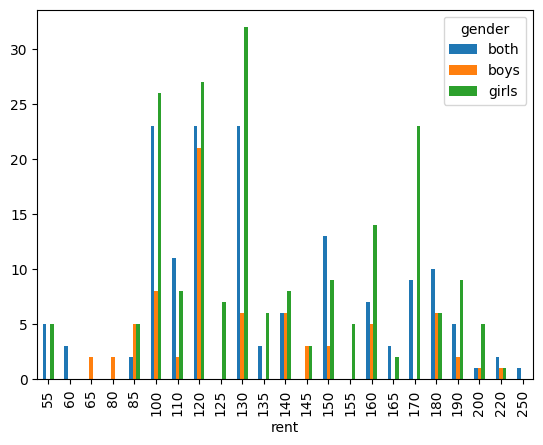

In [25]:
ct = pd.crosstab(df.gender, df.rent)

ct.T.plot(kind='bar')

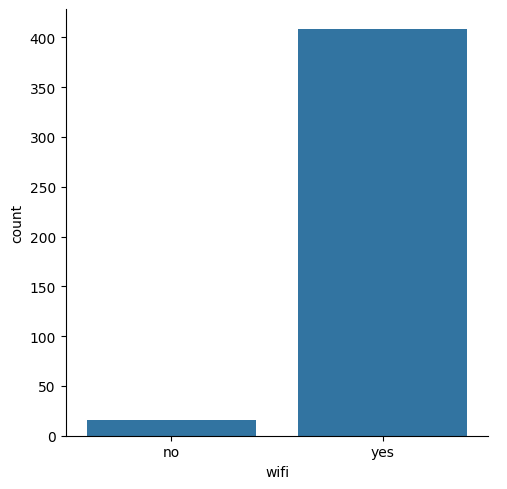

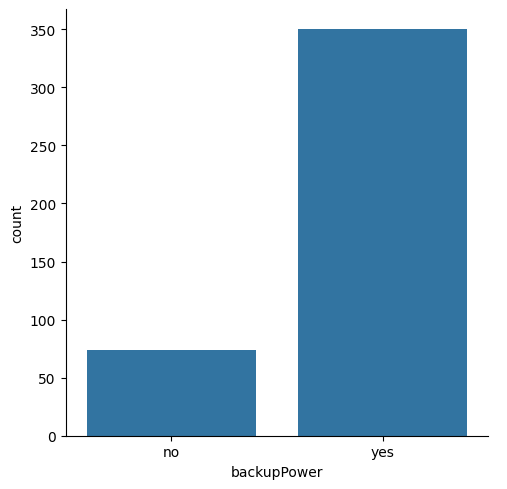

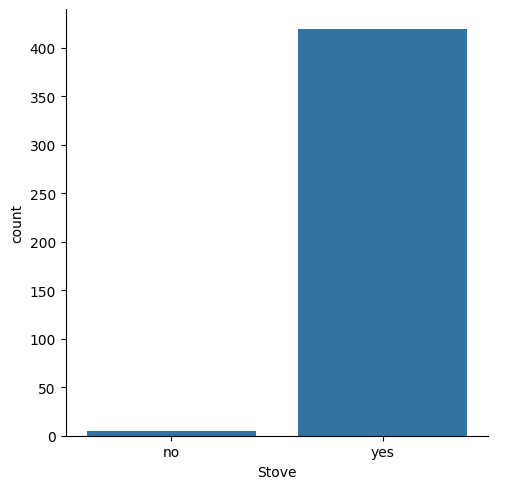

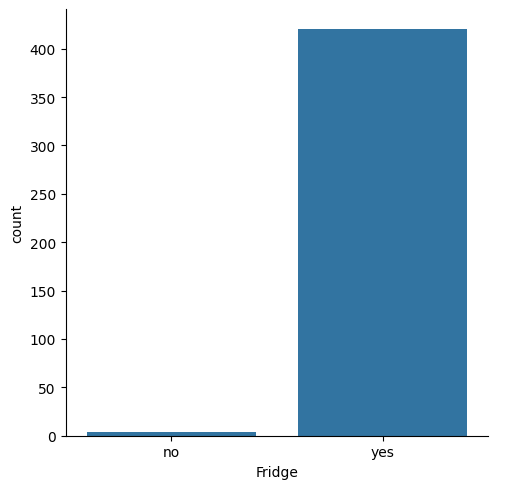

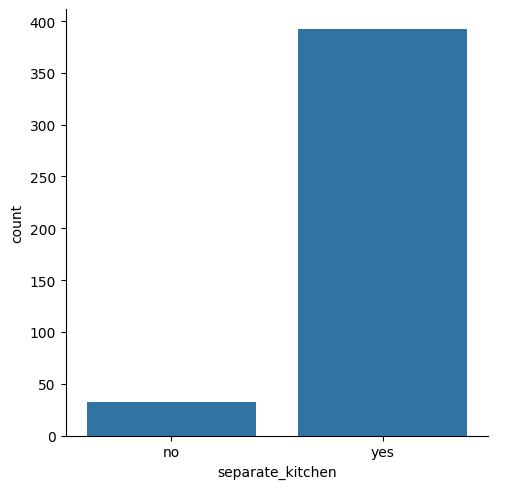

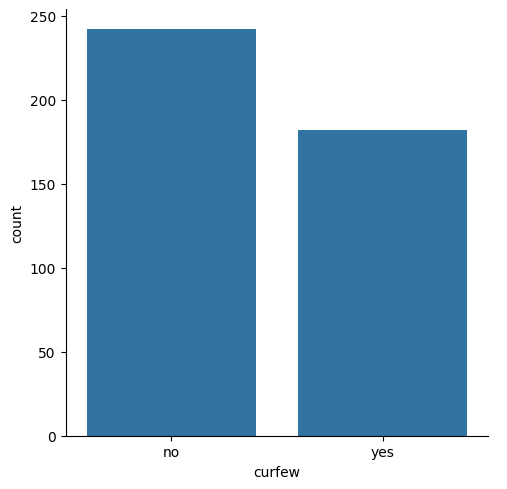

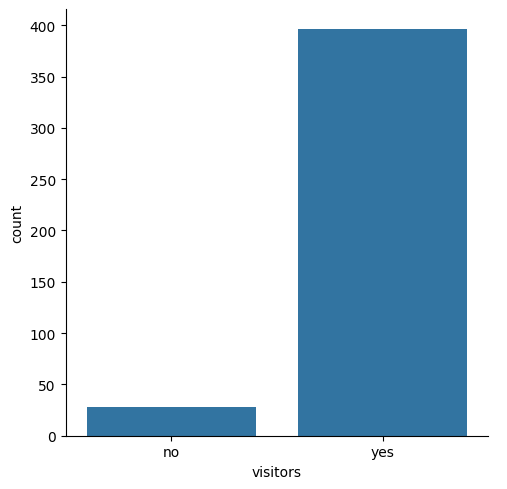

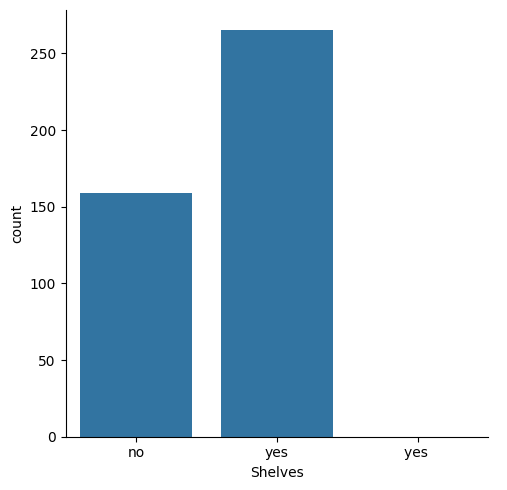

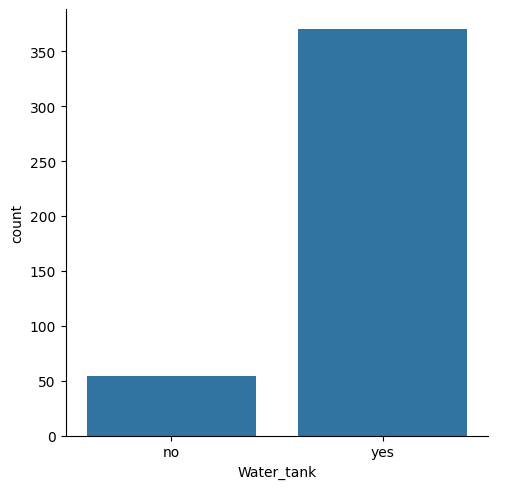

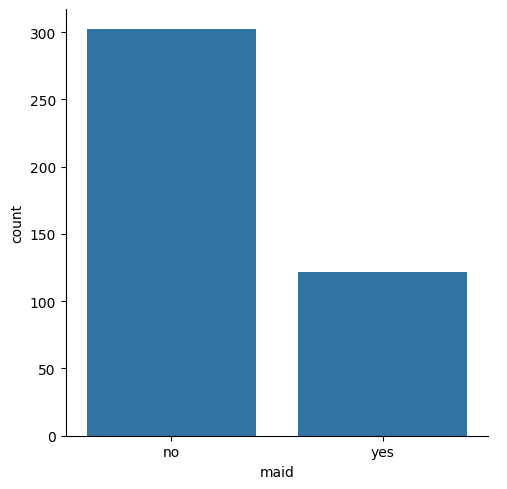

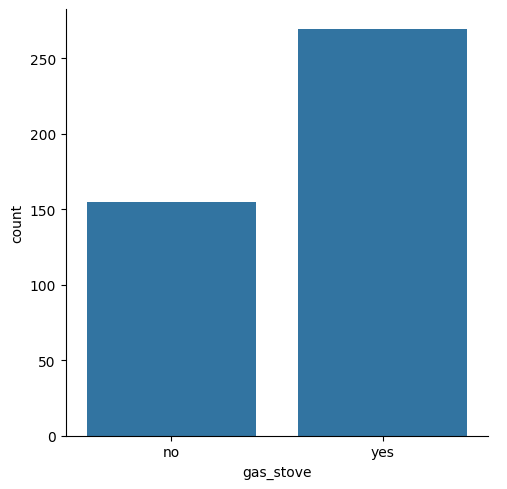

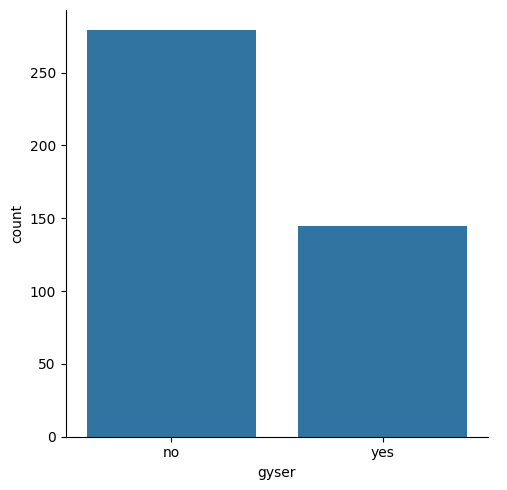

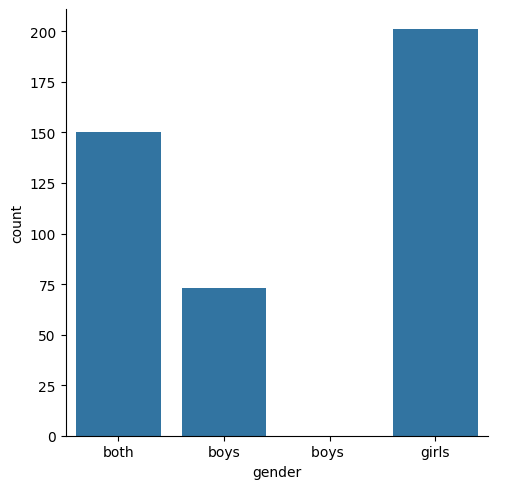

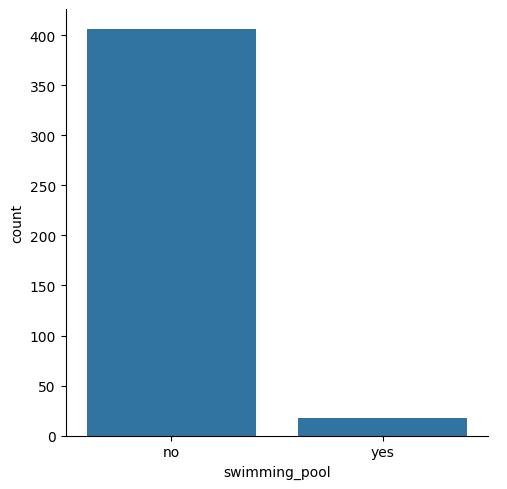

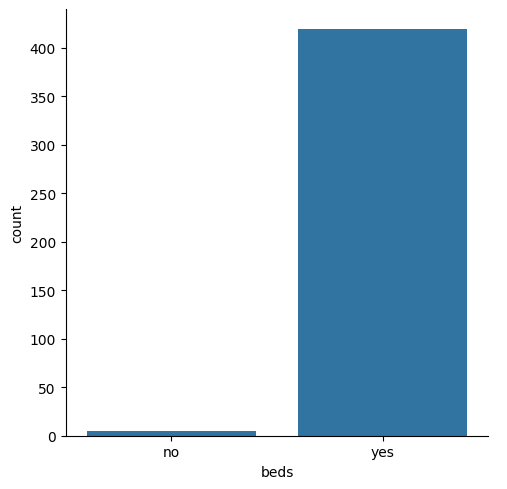

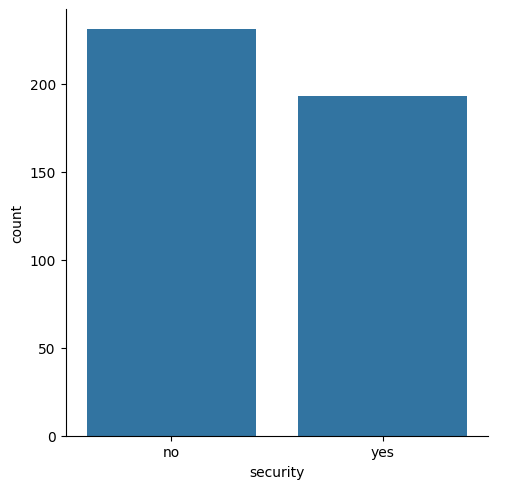

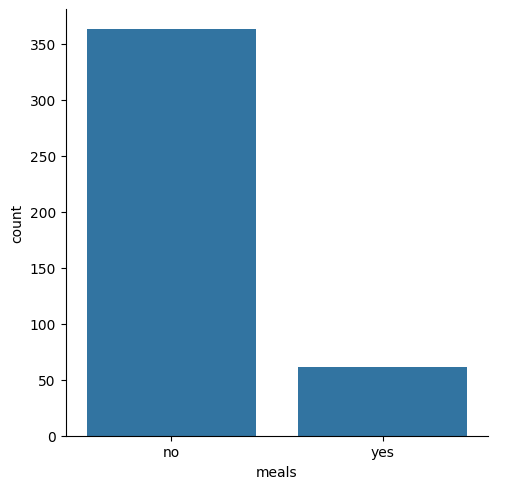

In [26]:
df.loc[df.Shelves == 'yes ', 'Shelves'] = 'yes'
df = df.loc[df.Shelves != ' yes']
df.loc[:, df.dtypes == 'category'].columns

df
for i in df.loc[:, df.dtypes == 'category'].columns:
    if i != 'Location':
        sns.catplot(kind='count', data=df, x=i)

<Axes: >

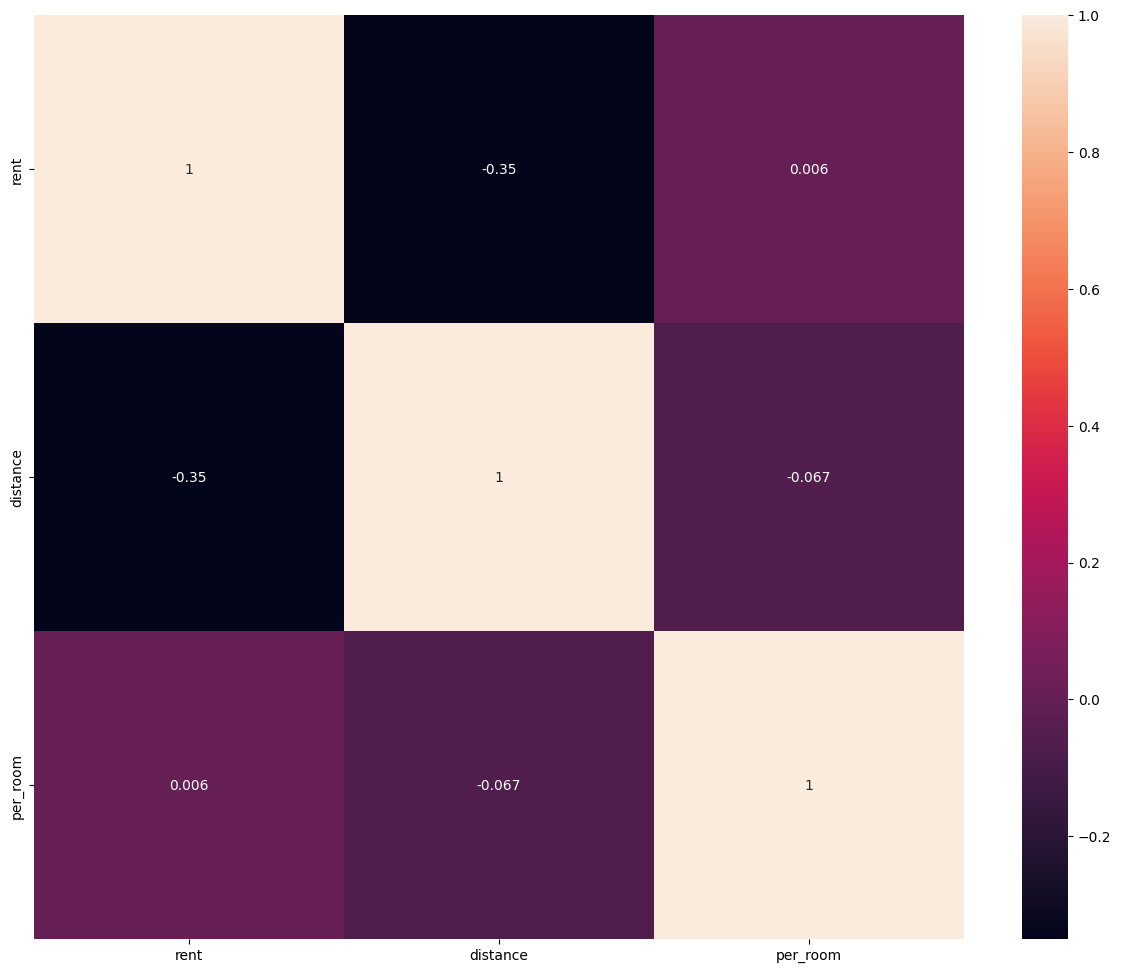

In [27]:
plt.figure(figsize=(15, 12))

sns.heatmap(df.loc[:, df.dtypes !='category'].corr(), annot=True)



## DATA PREPROCESSING


In [28]:
from sklearn.preprocessing import LabelEncoder
df2 = df

le = LabelEncoder()

columns = [col for col in df.loc[:, df.dtypes ==
                                 'category'].columns if col not in ('Location', 'Shelves', 'gender')]

for column in columns:

    df[column] = le.fit_transform(df[column])

## TUNING THE MODEL


In [29]:
# from sklearn.cluster import KMeans

# new_df = pd.DataFrame(X_transformed)
# new_df['y'] = df.rent
# kmeans = KMeans(n_clusters=2, random_state=0).fit_transform(pd.DataFrame(scaled))
# kmeans

# plt.figure(figsize=(12,7))
# bucket_width = 20

# # df['price_bucket'] = pd.cut(df['rent'], bins=range(min(df['rent']), max(df['rent']) + bucket_width, bucket_width))


# # Print the DataFrame
# sns.scatterplot(kmeans[:,1], kmeans[:,0])

# kdf = pd.DataFrame({'x': kmeans[:,1], 'y': kmeans[:,0] })
# kdf.loc[kdf.x > 14.5]
# # df = df.drop(kdf.x > 14.5)
# df['x'] = kmeans[:,0]
# df['y'] = kmeans[:,1]
# df.head(30)

# !pip install scikit-learn


In [30]:


from sklearn.utils import shuffle


df = df.loc[~((df.meals == 0) & (df.rent > 179) &
              (df.Location == 'mt_pleasant')), :]
# df = df.drop([27])
df.loc[(df.meals == 1) & (df.rent < 170), 'meals'] = 0

X = df[(df.Location != 'avenue')].drop(labels=['rent'], axis=1)
y = df[(df.Location != 'avenue')].rent


# df[df.Location == 'parirenyatwa']

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
Transfromer = ColumnTransformer(
    [('one_hot', one_hot, ['Location', 'Shelves', 'gender'])], remainder='passthrough')
X_transformed = Transfromer.fit_transform(X)

In [32]:
# from sklearn.decomposition import PCA, KernelPCA
# from sklearn.preprocessing import StandardScaler
# from sklearn.manifold import TSNE, Isomap

# scaler = StandardScaler()
# scaled = scaler.fit_transform(X_transformed)
# kpca = KernelPCA(n_components=15, kernel='rbf',
#                   random_state=42)


# pca = PCA(n_components= 2)
# # pca.fit(scaled)
# # print(kpca.explained_variance_ratio_.sum())
# x_pca = pca.fit_transform(scaled)
# # x_pca
# # kpca.explained_variance_ratio_.sum()
# # x_pca = TSNE(n_components=2, learning_rate='auto',
# #                    init='random', perplexity=3).fit_transform(scaled)
# isomap = Isomap(n_neighbors=10, n_components=2,
#                 eigen_solver='auto')
# x_pca = isomap.fit_transform(scaled)
# x_pca

In [33]:
# from sklearn.cluster import KMeans
# print(len(kmeans))
# new_df = pd.DataFrame(X_transformed)
# new_df['y'] = df.rent
# kmeans = KMeans(n_clusters=2, random_state=0).fit_transform(X_transformed)
# kmeans

# plt.figure(figsize=(12,7))
# bucket_width = 20

# # df['price_bucket'] = pd.cut(df['rent'], bins=range(min(df['rent']), max(df['rent']) + bucket_width, bucket_width))


# # Print the DataFrame
# # sns.scatterplot(kmeans[:,1], kmeans[:,0])

# kdf = pd.DataFrame({'x': kmeans[:,1], 'y': kmeans[:,0] })
# # kdf.loc[kdf.x > 14.5]
# df['x'] = kmeans[:,1]
# df['y'] = kmeans[:,0]

# # df


# #

In [34]:
# import tensorflow as tf
# from tensorflow import keras

## MODELLING


In [200]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV, LinearRegression, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# reg= SVR(kernel= 'rbf')

random_number = np.random.randint(1, 1000)

scaler = StandardScaler()
scaledData = scaler.fit_transform(X_transformed)

# param_dist = {
#     # 'max_depth': range(3, 10),
#     # 'min_child_weight': range(1, 11),
#     # 'gamma': np.arange(0, 5),
#     # Use np.random.uniform for continuous range

#     'learning_rate': np.arange(0.1, 0.5, 0.01),
#     # Adjust upper bound based on computational resources
#     'n_estimators': np.arange(10, 1001, 10),

# }


kNeighbors = KNeighborsRegressor()
svm = SVR()
LinearRegression = LassoCV()
randomForest = RandomForestRegressor()
xgboost = xgb.XGBRegressor(learning_rate=0.199999999999, n_estimators=184)

models = [{'name': "kNeighbors", "model": kNeighbors},
          {"name": "support vector machine", "model": svm},

          {"name": "LassoCV regression", "model": LinearRegression},
          {"name": "random forest", "model": randomForest
           }, {"name": "xgboost", "model": xgboost}]

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2)
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

# xg = kNeighbors.fit(X_train, y_train)

# knn = RandomForestRegressor()

# rs_reg = GridSearchCV(xgboost, param_grid=param_dist, cv=5, verbose=2)


# model.fit(X_train, y_train)

# print(model.score(X_test, y_test))

# y_preds = model.predict(X_test)
# y_preds
# errordf = pd.DataFrame({"y_preds": y_preds, "y_test": y_test, 'error': abs(y_preds- y_test)})

# result_dict = {}

# for model in models:
#     cv_result = cross_val_score(model['model'], scaledData,  y, cv=5).mean()
#     result_dict[model['name']] = cv_result

# print(pd.Series(result_dict))

# pd.Series(result_dict).plot.bar()
# pd.DataFrame(pd.Series(result_dict), columns = ['score'])
# rs_reg.fit(X_transformed, y)
# rs_reg.best_score_
# errordf =  df[['rent', 'distance', 'meals', 'per_room']].merge(errordf, how= 'inner', left_index=True, right_index= True)
# errordf
# df[-84:].head(60)
xgboost.fit(X_train,y_train)
# cross_val_score(xgboost,scaledData,y,cv = 5  ).mean()
xgboost.score(X_test,y_test)

0.9004677791337585

In [202]:

# value = xgboost.predict(X_test[0:1,:])
import pickle
np.array([1]).tolist()[0]

# with open('model.pkl', 'wb') as f:
#     pickle.dump(xg, f)
with open('xg_boost.pkl', 'wb') as f:
    pickle.dump(xgboost, f)

In [36]:
# from sklearn.metrics import r2_score

# model = keras.Sequential([
#     keras.layers.Dense(units=64, activation="relu",),  # First hidden layer
#     keras.layers.Dense(units=32, activation="relu"),  # Second hidden layer
#     keras.layers.Dense(units=1)  # Output layer for predicted rent price
# ])
# model.compile(optimizer="adam", loss="mse", metrics=["mse"] )
# model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# # loss,mse = model.evaluate(X_test, y_test)
# preds =model.predict(X_test)
# print(r2_score(y_test, preds))

In [37]:
# result_dict['neural network'] = r2_score(y_test, preds)

# score_df.plot.bar()


# score_df= pd.DataFrame(pd.Series(result_dict), columns = ['r2_score'])
# score_df

In [38]:

# # Adjust the list length and colors as needed
# colors = ["blue", "green", "red", "orange", "yellow"]
# score_df.plot.bar(color=colors)

xg

KNeighborsRegressor()

In [39]:
# pd.DataFrame(
    # {'preds': pd.Series(preds.T[0], index=y_test.index), 'y_test': y_test})
# pd.Series(preds.T[0], index= y_test.index)

<Axes: >

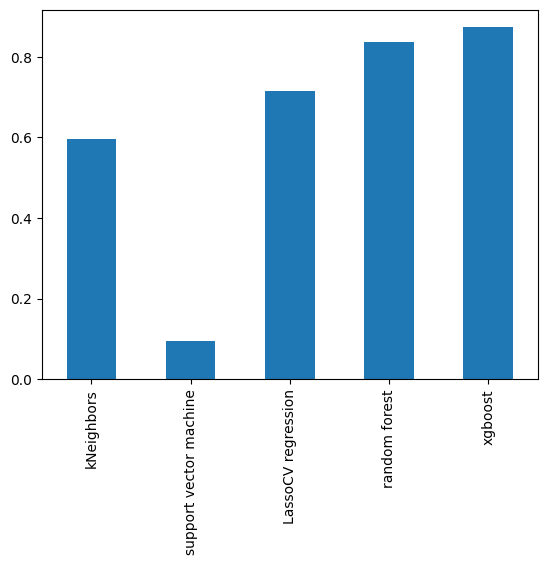

In [40]:
pd.Series(result_dict).plot.bar()

In [41]:
df[df.Location == 'Alex park']

,Location,rent,wifi,backupPower,Stove,Fridge,separate_kitchen,curfew,distance,visitors,...,Water_tank,maid,gas_stove,gyser,gender,swimming_pool,per_room,beds,security,meals
27,Alex park,150,1,0,1,1,0,0,0.693147,1,...,1,0,1,0,both,0,3,1,1,0


In [42]:
xg

KNeighborsRegressor()

In [43]:
# new_df = df.merge(errordf, how= 'inner', left_index=True, right_index= True)
# new_df2 = df.merge(errordf, how= 'inner', left_index=True, right_index= True)

In [44]:
# new_df[new_df.error>10][['Location', 'y_preds', 'y_test', 'error']]
# # new_df[new_df.error>7][['Location', 'y_preds', 'y_test']]

In [45]:
df[df.Location == 'mount_pleasant']

,Location,rent,wifi,backupPower,Stove,Fridge,separate_kitchen,curfew,distance,visitors,...,Water_tank,maid,gas_stove,gyser,gender,swimming_pool,per_room,beds,security,meals
24,mount_pleasant,130,1,1,1,1,1,0,2.397895,1,...,1,1,0,0,girls,0,4,1,1,0
29,mount_pleasant,165,1,1,1,1,1,0,1.945910,1,...,1,0,1,0,both,0,2,1,0,0


In [46]:
df.loc[[117, 195]]

,Location,rent,wifi,backupPower,Stove,Fridge,separate_kitchen,curfew,distance,visitors,...,Water_tank,maid,gas_stove,gyser,gender,swimming_pool,per_room,beds,security,meals
117,mt_pleasant,135,1,1,1,1,0,0,3.401197,1,...,1,0,1,1,girls,0,2,1,0,0
195,mt_pleasant,135,1,1,1,1,1,1,1.945910,1,...,0,0,0,0,girls,1,3,1,0,0


In [205]:
import pickle


# with open('model.pkl', 'wb') as f:
#     pickle.dump(xg, f)
with open('transformer.pkl', 'wb') as f:
    pickle.dump(Transfromer, f)



# from pydantic import BaseModel

# class House(BaseModel):
#     Location: str
#     wifi: int
#     backupPower: int
#     Stove:int
#     Fridge:int
#     separate_kitchen: int
#     curfew: int
#     distance: float
#     visitors:int
#     Shelves:str
#     Water_tank: int
#     maid: int
#     gas_stove: int
#     gyser:int
#     gender: str
#     swimming_pool:int
#     per_room:int
#     beds:int
#     security: int
#     meals:int


# app = FastAPI()

# # with open('model.pkl', 'rb') as f:
# #     model = pickle.load(f)
# #     print(model)
# # transformer   = pickle(open('transformer.pkl', 'rb'))

# @app.post('/predict')
# async def predict(data: House):

#     # point = pd.Series(data).to_frame().T


#     return 'augah'

# import sklearn
# print(sklearn.__version__)

In [48]:
data = {'Location': 'mt_pleasant', 'wifi': 1, 'backupPower': 1, 'Stove': 1, 'Fridge': 0,
        'separate_kitchen': 1, 'curfew': 0, 'distance': 2.456, 'visitors': 1, 'Shelves': 'yes',
        'Water_tank': 1, 'maid': 1, 'gas_stove': 1, 'gyser': 1, 'gender': 'both', 'swimming_pool': 0,
        'per_room': 5, 'beds': 0, 'security': 1, 'meals': 1}

In [49]:
# point = Transfromer.transform(pd.DataFrame(data, index=range(0,1)))
pd.DataFrame(data, index=range(0,1)).to_numpy()
# point

array([['mt_pleasant', 1, 1, 1, 0, 1, 0, 2.456, 1, 'yes', 1, 1, 1, 1,
        'both', 0, 5, 0, 1, 1]], dtype=object)

['test.joblib']

In [51]:
augah ={
    "Location": {
        "0": "mt_pleasant", "1": "mt_pleasant"
    },
    "wifi": {
        "0": 1,"1":0
    },
    "backupPower": {
        "0": 
            1,"1":1
        
    },
   }

In [52]:
(pd.DataFrame(augah))

,Location,wifi,backupPower
0,mt_pleasant,1,1
1,mt_pleasant,0,1
